Nesta aula iremos estudar mas manipulação e interpretação de gráficos

#Preparação das bibliotecas e carga dos dados

In [1]:
import pandas as pd
dados_url="/content/A114710189_28_143_208.csv"
dados=pd.read_csv(dados_url, encoding= "ISO-8859-1", skiprows= 3, sep=";", skipfooter= 12, thousands=".", decimal=",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


#Preparação e Manipulação dos dados

In [35]:
#ajustando formatação de valor decimal para visualizar melhor
pd.options.display.float_format = '{:,.2f}'.format

#filtrando apenas a colunas que possuem dados (retirando colunas com observacoes nulas)
colunas_usaveis=dados.mean().index.tolist()

#inserindo a coluna Unidade da Federação para filtro na lista
colunas_usaveis.insert(0, "Unidade da Federação")

#montando um novo dataframe para usar a Unidade da Federação como index
usaveis = dados[colunas_usaveis]

#alterando o index para utilizar a coluna Unidade da Federação
usaveis = usaveis.set_index("Unidade da Federação")

#testando o comando slice com essa nova base
usaveis[["2021/Jan" , "2021/Fev" , "2021/Mar"]]


,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,
11 Rondônia,"8,414,690.60","6,039,419.59","4,732,441.04"
12 Acre,"3,005,561.16","2,272,733.90","1,137,341.65"
13 Amazonas,"24,439,059.57","13,679,358.06","6,799,060.80"
14 Roraima,"3,209,323.68","3,044,798.77","2,381,844.31"
15 Pará,"33,887,773.65","23,343,222.94","13,069,564.31"
16 Amapá,"2,513,766.36","1,534,733.18","989,155.40"
17 Tocantins,"347,626.85","416,534.32","928,756.84"
21 Maranhão,"26,797,697.76","23,260,245.95","17,294,509.11"
22 Piauí,"18,437,275.64","13,636,005.36","9,542,151.53"


##Os problemas de uma visualização em torta:

- Visualização em fatias é muito difícil de avaliar a proporção ou tamanho

- Gráfico muito difícil de fazer comparação

- Só é fácil de visualizar se ele estiver ordenado, com fácil leitura das legendas e com proporções bem disproporcionais, fácil de visualizar a diferença

- Nunca será um gráfico de informação precisa, necessário tomar muito cuidado para seu uso não gerar informações enviesadas

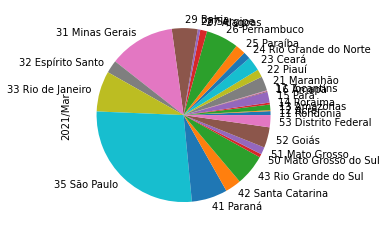

In [28]:
#montando um gráfico de pizza para mostrar visualização ruim

#filtramos a última referência (coloquei -2 pois no dataframe usaveis ainda tem a coluna "Total")
mes_mais_recente = usaveis.columns[-2]

#com a referencia do filtro, montamos uma Series com essa referência
amostra_mais_recente = usaveis[mes_mais_recente]

#plotando no formato de torta
amostra_mais_recente.plot(kind='pie')

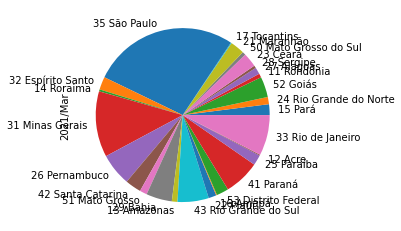

In [29]:
#plotando no formato de torta com valores fora de ordem
amostra_mais_recente.sample(frac=1).plot(kind='pie')

#Desafio #01: Montar uma tabela de comparação para seu estado

##Para tentar refinar informação com proporções (%)

In [47]:
#preparando uma amostra correlacionando as proporções de gastos
#sort_values() em uma série de dados não precisa descrever qual coluna será ordenado,
#inclusive se tentar forçar essa informação, vai gerar erro
amostra_mais_recente = amostra_mais_recente.sort_values(ascending=False)
amostra_mais_recente / amostra_mais_recente.loc["35 São Paulo"]

Unidade da Federação
35 São Paulo             1.00
31 Minas Gerais          0.45
33 Rio de Janeiro        0.28
41 Paraná                0.25
26 Pernambuco            0.22
43 Rio Grande do Sul     0.21
29 Bahia                 0.18
52 Goiás                 0.14
42 Santa Catarina        0.11
21 Maranhão              0.10
23 Ceará                 0.10
32 Espírito Santo        0.09
53 Distrito Federal      0.08
15 Pará                  0.07
25 Paraíba               0.07
22 Piauí                 0.05
51 Mato Grosso           0.05
24 Rio Grande do Norte   0.05
27 Alagoas               0.05
13 Amazonas              0.04
11 Rondônia              0.03
50 Mato Grosso do Sul    0.02
28 Sergipe               0.02
14 Roraima               0.01
12 Acre                  0.01
16 Amapá                 0.01
17 Tocantins             0.01
Name: 2021/Mar, dtype: float64

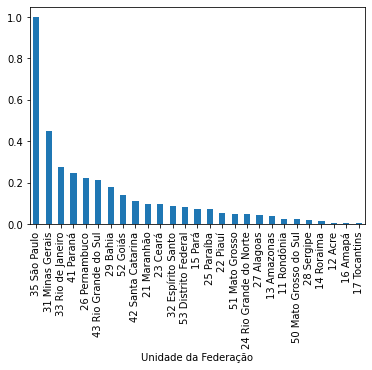

In [44]:
#montando um plot no formato barra
(amostra_mais_recente / amostra_mais_recente.loc["35 São Paulo"]).plot(kind='bar')

#Desafio #02: Estudar a documentação matplotlib e Pandas para colocar grid no gráfico

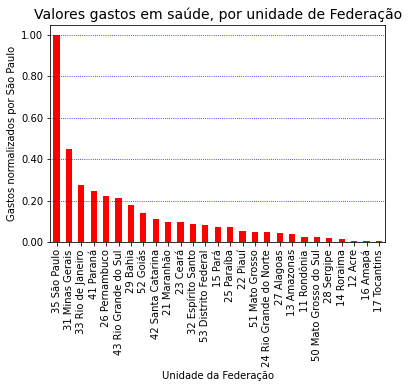

In [67]:
#montando um plot no formato barra
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#montando um plot em barra de cor vermelha
ax = (amostra_mais_recente / amostra_mais_recente.loc["35 São Paulo"]).plot(kind='bar', color='red')

#ajustando o título do gráfico, ajustando o tamanho da fonte
plt.title( "Valores gastos em saúde, por unidade de Federação", fontsize=14)

#ajustando o ticker para formatar o valor decimal e evitar notação científica
#informação editada aparece no eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#ajustando texto que irá aparecer no eixo y, editando o tamanho da fonte
ax.set_ylabel("Gastos normalizados por São Paulo", fontsize=10)

#com o método grid() editamos o sentido da linha com o "axis", o estilo da linha
#"linesytle" e a cor com "color"
plt.grid(axis="y", linestyle=':', color='blue')
plt.show()
